Equipe 23:
Francisco Viana
Gabriel Godinho
Guilherme Bilibio
José Augusto Viana
Ricardo Monteiro
Rodrigo Dittmar

---
## Importação das bibliotecas

In [1]:
# Instalar as bibliotecas necessárias (se ainda não estiverem instaladas)
%pip install pandas matplotlib seaborn scikit-learn xgboost

# Biblioteca Pandas - Manipulação de dados
import pandas as pd

# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# Biblioteca Seaborn - Visualização avançada de dados
import seaborn as sns

# Biblioteca NumPy - Operações com arrays e álgebra linear
import numpy as np

# Scikit-Learn - Codificação de variáveis categóricas (Label Encoding)
from sklearn.preprocessing import LabelEncoder

# Scikit-Learn - Divisão de dados em treino e teste
from sklearn.model_selection import train_test_split

# Scikit-Learn - Codificação de variáveis categóricas (One-Hot Encoding e Label Encoding)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Scikit-Learn - Algoritmo de regressão baseado em árvores (Random Forest)
from sklearn.ensemble import RandomForestRegressor

# XGBoost - Algoritmo de regressão baseado em boosting (XGBoost)
from xgboost import XGBRegressor

# Scikit-Learn - Métricas para avaliação de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp311-cp311-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ----- --------------------------------- 22.0/150.0 MB 115.7 MB/s eta 0:00:02
   ---------- ---------------------------- 40.1/150.0 MB 101.9 MB/s eta 0:00:02
   --------------- ------------------------ 58.2/150.0 MB 95.1 MB/s eta 0:00:0

---
## 1-Análise Exploratória dos dados

### a. Carregar a base de dados

In [2]:
# Carrega o arquivo CSV para um DataFrame (o arquivo csv está na mesma pasta do arquivo analise_exploratoria.ipynb)
df = pd.read_csv("precos_carros_brasil.csv", low_memory=False) # low_memory=False faz com que o pandas leia todo o arquivo de uma vez para determinar os tipos de dados corretos, em vez de processá-lo em partes. Não especifiquei manualmente os tipos de dados de cada coluna.

# Exibe as primeiras 5 linhas da tabela para verificar os dados
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


### b. Verificar valores faltantes e tratá-los

In [3]:
# Verifica quantos valores estão faltando em cada coluna
print("Valores faltantes por coluna:")
print(df.isnull().sum())

# Preenchendo colunas numéricas com a mediana (valor central dos dados)
num_cols = df.select_dtypes(include=['number']).columns  # Seleciona colunas numéricas
df[num_cols] = df[num_cols].fillna(df[num_cols].median())  # Substitui valores ausentes pela mediana

# Preenchendo colunas categóricas (texto) com a moda (valor mais frequente)
cat_cols = df.select_dtypes(include=['object']).columns  # Seleciona colunas de texto
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Substitui valores ausentes com a moda


Valores faltantes por coluna:
year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64


### c. Verificar dados duplicados

In [4]:

duplicated_rows = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicated_rows}")


df = df.drop_duplicates()


Número de linhas duplicadas: 65246


### d. Separar colunas numéricas e categóricas e exibir estatísticas

In [5]:
# Identifica colunas numéricas e categóricas
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Exibe estatísticas descritivas das variáveis numéricas
print("Resumo das variáveis numéricas:")
print(df[num_cols].describe())

# Exibe estatísticas das variáveis categóricas (ex: quantidade de valores únicos)
print("\nResumo das variáveis categóricas:")
print(df[cat_cols].describe())


Resumo das variáveis numéricas:
       year_of_reference     year_model  avg_price_brl
count      202296.000000  202296.000000  202296.000000
mean         2021.564697    2011.271518   52756.692901
std             0.571903       6.376225   51628.794894
min          2021.000000    2000.000000    6647.000000
25%          2021.000000    2006.000000   22855.000000
50%          2022.000000    2012.000000   38027.000000
75%          2022.000000    2016.000000   64064.000000
max          2023.000000    2023.000000  979358.000000

Resumo das variáveis categóricas:
       month_of_reference fipe_code authentication   brand  \
count              202296    202296         202296  202296   
unique                 12      2091         202295       6   
top               January  001216-5   3r6c277cnqcb    Fiat   
freq                24261       426              2   44963   

                                        model      fuel    gear engine_size  
count                                  202296    

### e. Contar valores por modelo e marca

In [6]:
# Conta quantas vezes cada modelo de carro aparece no conjunto de dados
print("Contagem de valores por modelo:")
print(df['model'].value_counts())

# Conta quantas vezes cada marca aparece no conjunto de dados
print("\nContagem de valores por marca:")
print(df['brand'].value_counts())


Contagem de valores por modelo:
model
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     426
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

Contagem de valores por marca:
brand
Fiat               44963
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64


--- 
## 2-Visualização dos dados

In [7]:
# Carregar o arquivo CSV (tem que estar na mesma pasta do script Python)
df_carros = pd.read_csv("precos_carros_brasil.csv", low_memory=False)

# Exibir as primeiras linhas para verificar se os dados foram carregados corretamente
print(df_carros.head())

   year_of_reference month_of_reference fipe_code authentication  \
0             2021.0            January  004001-0   cfzlctzfwrcp   
1             2021.0            January  004001-0   cdqwxwpw3y2p   
2             2021.0            January  004001-0   cb1t3xwwj1xp   
3             2021.0            January  004001-0   cb9gct6j65r0   
4             2021.0            January  004003-7   g15wg0gbz1fx   

            brand                                   model      fuel    gear  \
0  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
1  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
2  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
3  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p   Alcohol  manual   
4  GM - Chevrolet  Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI  Gasoline  manual   

  engine_size  year_model  avg_price_brl  
0           1      2002.0         9162.0  
1           1      2001.0     

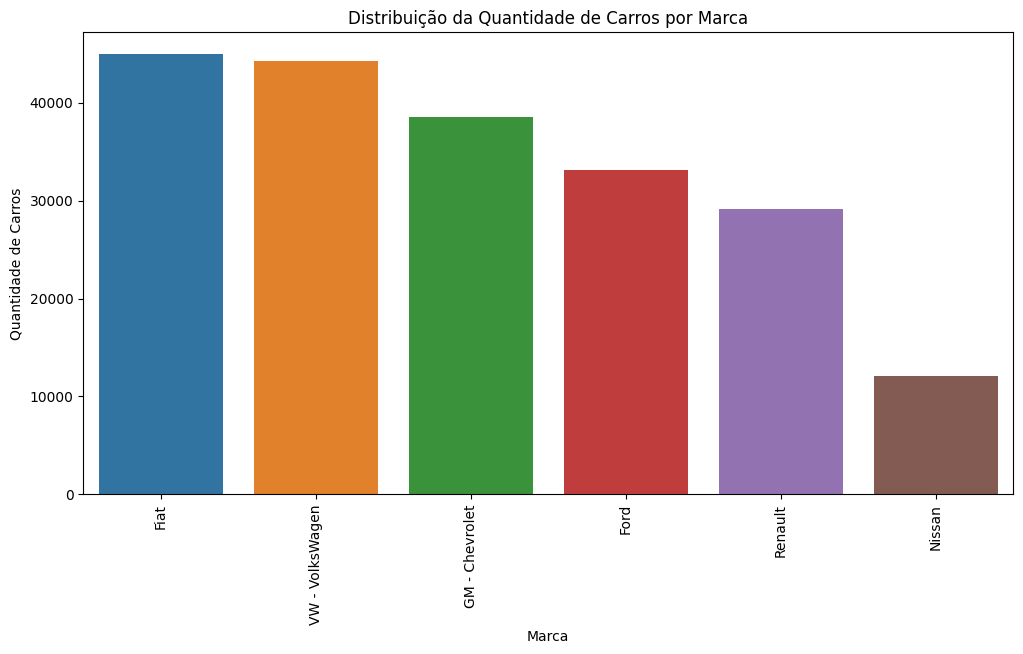

In [8]:
# a. Gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(12, 6))
carros_por_marca = df_carros["brand"].value_counts()
sns.barplot(x=carros_por_marca.index[:10], y=carros_por_marca.values[:10], hue=carros_por_marca.index[:10], dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel("Marca")
plt.ylabel("Quantidade de Carros")
plt.title("Distribuição da Quantidade de Carros por Marca")
plt.show()

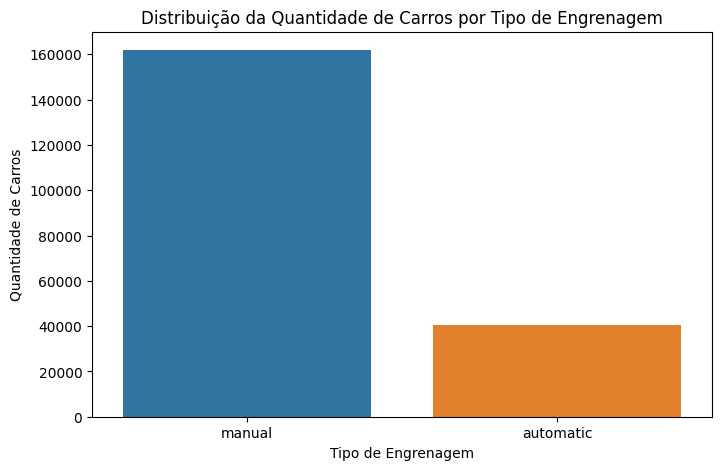

In [9]:
# b. Gráfico da distribuição da quantidade de carros por tipo de engrenagem
plt.figure(figsize=(8, 5))
carros_por_gear = df_carros["gear"].value_counts()
sns.barplot(x=carros_por_gear.index, y=carros_por_gear.values, hue=carros_por_gear.index, dodge=False, legend=False)
plt.xlabel("Tipo de Engrenagem")
plt.ylabel("Quantidade de Carros")
plt.title("Distribuição da Quantidade de Carros por Tipo de Engrenagem")
plt.show()

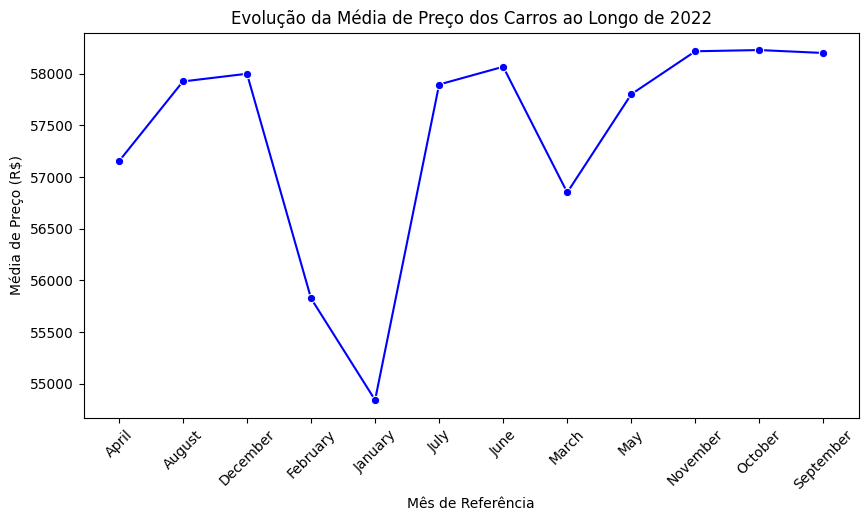

In [10]:
# c. Gráfico da evolução da média de preço dos carros ao longo dos meses de 2022
df_carros_2022 = df_carros[df_carros["year_of_reference"] == 2022]
df_carros_2022 = df_carros_2022.copy()  # Criar uma cópia explícita
df_carros_2022.loc[:, "month_of_reference"] = pd.Categorical(
    df_carros_2022["month_of_reference"],
    categories=["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"],
    ordered=True
)
media_preco_mensal = df_carros_2022.groupby("month_of_reference")["avg_price_brl"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=media_preco_mensal.index, y=media_preco_mensal.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Mês de Referência")
plt.ylabel("Média de Preço (R$)")
plt.title("Evolução da Média de Preço dos Carros ao Longo de 2022")
plt.show()

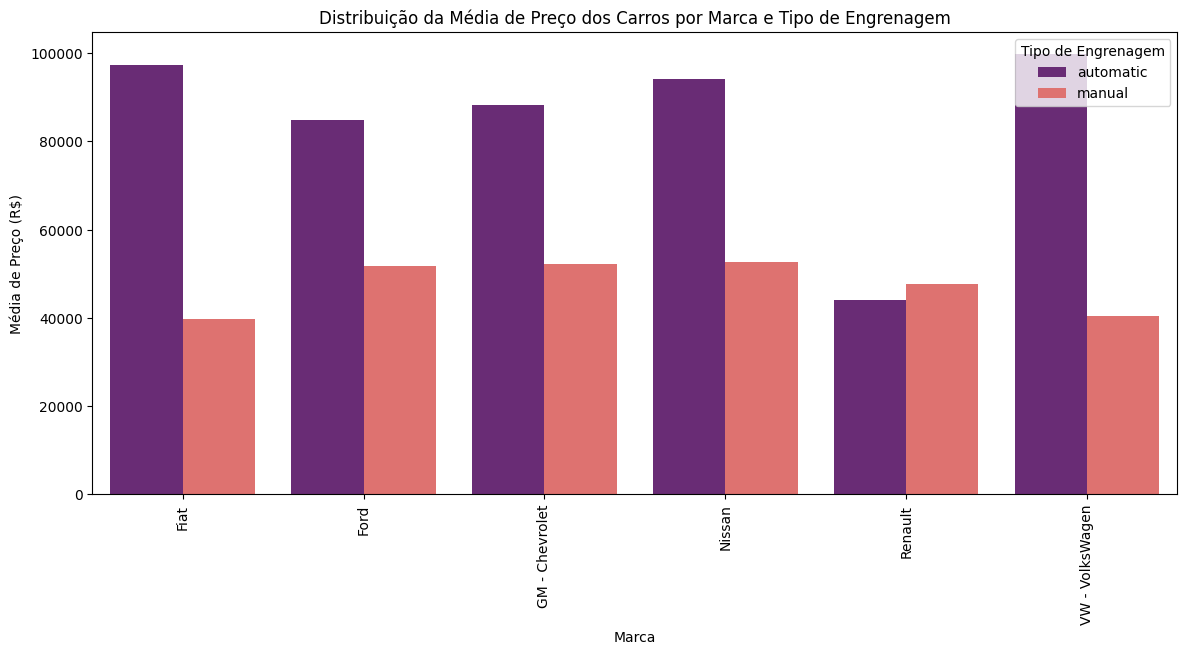

In [11]:
# d. Gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem
media_preco_por_marca_gear = df_carros.groupby(["brand", "gear"])["avg_price_brl"].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x="brand", y="avg_price_brl", hue="gear", data=media_preco_por_marca_gear, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Marca")
plt.ylabel("Média de Preço (R$)")
plt.title("Distribuição da Média de Preço dos Carros por Marca e Tipo de Engrenagem")
plt.legend(title="Tipo de Engrenagem")
plt.show()

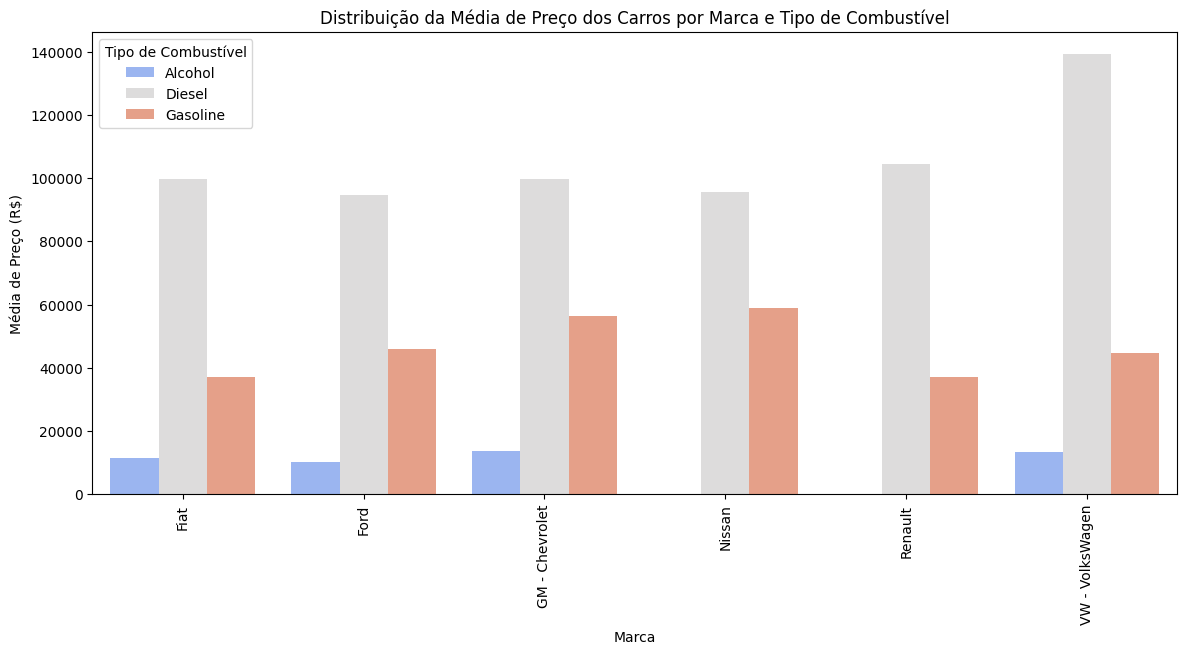

In [12]:
# e. Gráfico da distribuição da média de preço dos carros por marca e tipo de combustível
media_preco_por_marca_fuel = df_carros.groupby(["brand", "fuel"])["avg_price_brl"].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x="brand", y="avg_price_brl", hue="fuel", data=media_preco_por_marca_fuel, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Marca")
plt.ylabel("Média de Preço (R$)")
plt.title("Distribuição da Média de Preço dos Carros por Marca e Tipo de Combustível")
plt.legend(title="Tipo de Combustível")
plt.show()

---
## 3-Aplicação de modelos de machine learning para prever o preço médio dos carros

### Carregar a base de dados

In [13]:
# Carrega o arquivo CSV para um DataFrame (o arquivo csv está na mesma pasta do arquivo analise_exploratoria.ipynb)
df = pd.read_csv("precos_carros_brasil.csv", low_memory=False) # low_memory=False faz com que o pandas leia todo o arquivo de uma vez para determinar os tipos de dados corretos, em vez de processá-lo em partes. Não especifiquei manualmente os tipos de dados de cada coluna.

# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Exibe as primeiras 5 linhas da tabela para verificar os dados
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


### a. Escolha das variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo

In [14]:
# Identificar colunas categóricas
categorical_columns = ["brand", "model", "fuel", "gear", "engine_size"]

# Preencher valores nulos nas colunas categóricas com 'Desconhecido'
for col in categorical_columns:
    df[col] = df[col].fillna("Desconhecido")

# Converter 'engine_size' para número decimal (trocando vírgula por ponto)
df["engine_size"] = df["engine_size"].replace("Desconhecido", None)  # Substituir "Desconhecido" por NaN
df["engine_size"] = df["engine_size"].str.replace(",", ".").astype(float)

# Preencher valores nulos de 'engine_size' com a média
df["engine_size"] = df["engine_size"].fillna(df["engine_size"].mean())

# Aplicar Label Encoding para colunas com poucas categorias
label_encoders = {}  # Armazena os encoders usados
for col in ["fuel", "gear"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardar o encoder

# Aplicar One-Hot Encoding para 'brand'
df = pd.get_dummies(df, columns=["brand"], prefix="brand")

# Selecionar variáveis independentes (X) e variável alvo (y)
X = df.drop(columns=["avg_price_brl", "month_of_reference", "fipe_code", "authentication", "model"])
y = df["avg_price_brl"]

# Exibir resultado final
print("\nDados transformados prontos para regressão:")
print(X.head())


Dados transformados prontos para regressão:
   year_of_reference  fuel  gear  engine_size  year_model  brand_Desconhecido  \
0             2021.0     3     2          1.0      2002.0               False   
1             2021.0     3     2          1.0      2001.0               False   
2             2021.0     3     2          1.0      2000.0               False   
3             2021.0     0     2          1.0      2000.0               False   
4             2021.0     3     2          1.6      2001.0               False   

   brand_Fiat  brand_Ford  brand_GM - Chevrolet  brand_Nissan  brand_Renault  \
0       False       False                  True         False          False   
1       False       False                  True         False          False   
2       False       False                  True         False          False   
3       False       False                  True         False          False   
4       False       False                  True         False       

### b. Criando partições de treino (75%) e teste (25%)

In [15]:
# Selecionar variáveis independentes (X) e variável alvo (y)
X = df.drop(columns=["avg_price_brl", "month_of_reference", "fipe_code", "authentication", "model"])
y = df["avg_price_brl"]

# Dividir os dados em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Exibir tamanhos dos conjuntos de dados
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (200656, 12)
Tamanho do conjunto de teste: (66886, 12)


### c. Treinamento dos modelos

In [16]:
# Verificar se há valores ausentes nos dados
print("Valores ausentes antes do tratamento:")
print(X_train.isna().sum())
print(y_train.isna().sum())

# Preencher valores ausentes com a média das colunas
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Treinar RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Predições com RandomForest
rf_predictions = rf_model.predict(X_test)

# Avaliação do modelo RandomForest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("RandomForestRegressor Avaliação:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R²: {rf_r2}")

# Treinar XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predições com XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Avaliação do modelo XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBRegressor Avaliação:")
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"R²: {xgb_r2}")


Valores ausentes antes do tratamento:
year_of_reference        48781
fuel                         0
gear                         0
engine_size                  0
year_model               48781
brand_Desconhecido           0
brand_Fiat                   0
brand_Ford                   0
brand_GM - Chevrolet         0
brand_Nissan                 0
brand_Renault                0
brand_VW - VolksWagen        0
dtype: int64
48781
RandomForestRegressor Avaliação:
MAE: 4899.312746119032
MSE: 96211948.1802899
R²: 0.9515396926634963

XGBRegressor Avaliação:
MAE: 4515.468568912877
MSE: 87097148.42470054
R²: 0.9561306608937502


### d. Armazenando os valores preditos

In [17]:

rf_predicted_values = rf_predictions
xgb_predicted_values = xgb_predictions

### e. Analisando a importância das variáveis

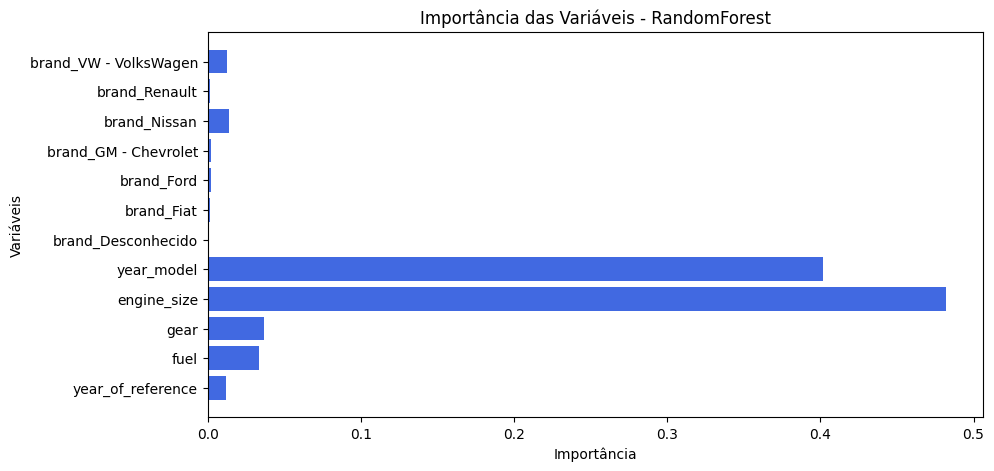

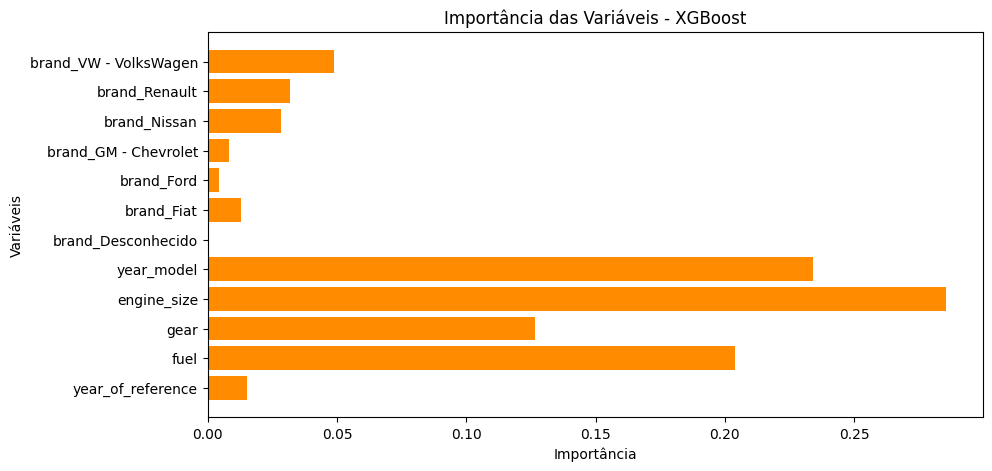


RandomForest Metrics:
Mean Absolute Error (MAE): 4899.3127
Mean Squared Error (MSE): 96211948.1803
R² Score: 0.9515

XGBoost Metrics:
Mean Absolute Error (MAE): 4515.4686
Mean Squared Error (MSE): 87097148.4247
R² Score: 0.9561


In [18]:
# Análise de importância das variáveis para o modelo RandomForest
rf_importances = rf_model.feature_importances_
rf_features = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(rf_features, rf_importances, color='royalblue')
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis - RandomForest")
plt.show()

# Análise de importância das variáveis para o modelo XGBoost
xgb_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.barh(rf_features, xgb_importances, color='darkorange')
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis - XGBoost")
plt.show()

# Comparação das métricas de avaliação
def print_metrics(model_name, mae, mse, r2):
    print(f"\n{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

print_metrics("RandomForest", rf_mae, rf_mse, rf_r2)
print_metrics("XGBoost", xgb_mae, xgb_mse, xgb_r2)

### g. Comparação e escolha do melhor modelo

In [19]:
def print_metrics(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred)  
    r2 = r2_score(y_true, y_pred) 
    print(f"\n{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return r2


rf_r2 = print_metrics("RandomForest", y_test, rf_predictions)


xgb_r2 = print_metrics("XGBoost", y_test, xgb_predictions)


best_model = "RandomForest" if rf_r2 > xgb_r2 else "XGBoost"
print(f"\nO melhor modelo foi: {best_model}, baseado no maior R².")


RandomForest Metrics:
Mean Absolute Error (MAE): 4899.3127
Mean Squared Error (MSE): 96211948.1803
R² Score: 0.9515

XGBoost Metrics:
Mean Absolute Error (MAE): 4515.4686
Mean Squared Error (MSE): 87097148.4247
R² Score: 0.9561

O melhor modelo foi: XGBoost, baseado no maior R².
